# 曽呂利新左衛門問題

## 【問題1】100日目の米粒の数

### 100日目には合計で米粒をいくつもらっているのかを計算するコードを作成し、答えを出力してください。

In [2]:
# 初日の米の数
today = 1
# 初日の累計
amount = 1

# その日にもらう米の数
list_n_grains = []
list_n_grains.append(today)

# その日までに累計でもらう米の数
list_total_grains = []
list_total_grains.append(amount)

for _ in range(1, 100):
    today *= 2
    list_n_grains.append(today)
    amount +=  today
    list_total_grains.append(amount)
    
# print(list_n_grains)
# print(len(list_n_grains))
# print(list_total_grains)
# print(len(list_total_grains))

print("100日目にもらう米粒は{}粒である。".format(list_total_grains[-1]))

100日目にもらう米粒は1267650600228229401496703205375粒である。


### 1日目から100日目までの「その日にもらう米の数」と「その日までに累計で貰う米の数」の推移を折れ線グラフで表現してください。（縦軸が米の数、横軸が日数）

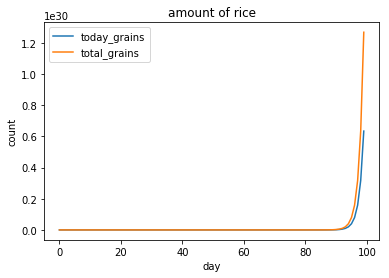

In [132]:
import matplotlib.pyplot as plt
%matplotlib inline

# グラフを表示する。タイトルと軸ラベル名付き。
plt.title("amount of rice")
plt.xlabel("day")
plt.ylabel("count")
plt.plot(list_n_grains, label="today_grains")  # 「リスト名」のところにリストの変数名を入れる
plt.plot(list_total_grains, label="total_grains")  # 「リスト名」のところにリストの変数名を入れる
plt.legend()
plt.show()

## 【問題2】100日目以外の米粒の数

### この逸話は30日だったり81日だったりと日数が曖昧です。どの話にも対応できるように日数を引数とした 関数 を作成しましょう。
#### 以下の雛形には関数としての枠組みだけではなく、引数や戻り値についてのコメントも記載してあります。参考にして、自分なりにも分かりやすくコメントを書き換えてください。

In [42]:
def compute_sorori_shinzaemon(n_days=100):
   #　曽呂利新左衛門の米の逸話における、日にちごとの米の粒の数を計算する関数。 

    today = 1
    amount = 1

    list_n_grains = []
    list_n_grains.append(today)

    list_total_grains = []
    list_total_grains.append(amount)

    for i in range(1, n_days):
        today *= 2
        list_n_grains.append(today)
        amount +=  today
        list_total_grains.append(amount)
    
    # ここにコードを書く。passは何もしないことを意味する命令である。
    pass
    return list_n_grains, list_total_grains

# コース受講日数
target = 120

list_n_grains, list_total_grains = compute_sorori_shinzaemon(n_days=target)

### 関数を作成した上で、コース受講日数でいくつ米粒をもらえるかを答えてください。問題1と同様に折れ線グラフも出力してください。

120日目にもらう米粒は1329227995784915872903807060280344575粒である。


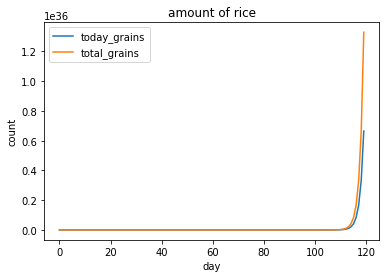

In [43]:
print("{}日目にもらう米粒は{}粒である。".format(target, list_total_grains[-1]))

import matplotlib.pyplot as plt
%matplotlib inline
# グラフを表示する。タイトルと軸ラベル名付き。
plt.title("amount of rice")
plt.xlabel("day")
plt.ylabel("count")
plt.plot(list_n_grains, label="today_grains")  # 「リスト名」のところにリストの変数名を入れる
plt.plot(list_total_grains, label="total_grains") 
plt.legend()
plt.show()

## 【問題3】貰える米で何人が何日生活できるか

### この米があれば何人が何日生活できるか計算する関数を作成してください。コースを受講する期間に貰える米粒で、このクラスにいる人数であれば、何日間生活できるかを出力してみましょう。


#### 関数の最低限の入力は 米粒の数(int) と 人数(int) 、出力は 生活できる日数(int) です。関数名やコメントなどは分かりやすく考えて作成してください。


#### ここでは1日に必要な米粒の数は提示しません。自分なりに調べて、計算式に落とし込んでください。どう調べ、何を根拠にしたかもコメントを残しておいてください。

農林水産省
URL：https://www.maff.go.jp/j/heya/sodan/1806/03.html

子どもから、「茶碗1杯のごはんはお米何粒？また、稲だと何株？」と質問されました。目安を教えてください。
品種や炊き方により違いはありますが、茶碗1杯（中盛り）のごはんの重さは約150gで、お米（精米）だと約65gです。
これは、お米は炊くと一緒に入れた水を吸って膨らむため、ごはんの重さはお米の重さの約2．3倍になるからです。
茶椀1杯のお米の粒（約65g）を数えると、約3，250粒あります。

公益社団法人　米殻安定供給確保支援機構
URL:https://www.komenet.jp/sedai02/95.html
体内のエネルギー代謝を正常にするためには、最低でも1日に100～150gの炭水化物が必要です。ごはんに換算すると、ごはん茶碗約2杯です。しかし、あくまでも必要な最低量なので、普通に生活している人は、1日にお茶碗3～4杯分は摂るようにしましょう。体内に貯めることができる炭水化物の量はわずかですので、1日の食事で常に適量を摂る必要があります。

In [47]:
# mathモジュールインポート
import math

"""
仮定
米1日必要最低限量で計算する
１人1日最低必要量　：　茶碗２杯　× 3,250粒　= 6,500粒
"""

def able_suvive(people):
    
    # １人1日最低必要量の米粒数
    day_need_amount = 6500
    
   # 生活できる日数 = もらった米粒総数　/ １人1日最低必要量の米粒数　/ 受講生数
    survive_day = list_total_grains[-1] / day_need_amount / people
    
    return survive_day

# 受講生数
student = 14
# 小数点切り捨て
survive_day = math.floor(able_suvive(people=student))

print("{}日間もらって、{}人が生活できるのは{}日である。".format(target, student, survive_day))

120日間もらって、14人が生活できるのは14606901052581492645803614797824日である。
